In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import KNNImputer

In [4]:
df = pd.read_csv("../data/laptop_prices.csv")

In [5]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [7]:
# Mostrar valores nulos de cada columna
print("Conteo de valores nulos por columna:")
df.isnull().sum()

Conteo de valores nulos por columna:


Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

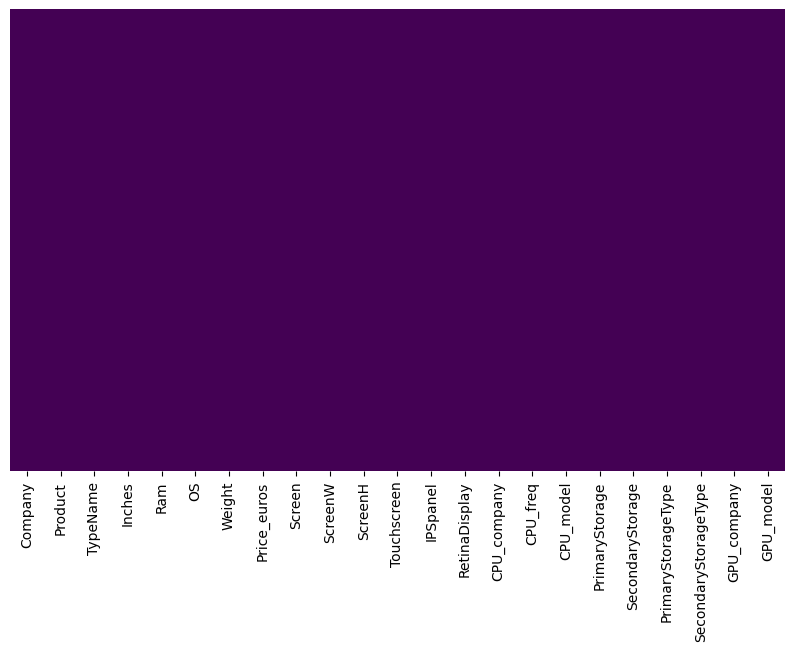

In [8]:
# Visualización de valores nulos
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

In [9]:
# Agregar valores nulos al dataset a propósito

# Número de filas a las que se les asignará NaN
num_rows = 50 
# Columnas a las que se les asignará NaN
columns_to_nullify = ['Weight', 'OS', 'CPU_freq', 'PrimaryStorageType']

for col in columns_to_nullify:
  random_indices = df.sample(n=num_rows, random_state=42).index
  df.loc[random_indices, col] = np.nan

In [10]:
# Mostrar valores nulos de cada columna
print("Conteo de valores nulos por columna:")
df.isnull().sum()

Conteo de valores nulos por columna:


Company                  0
Product                  0
TypeName                 0
Inches                   0
Ram                      0
OS                      50
Weight                  50
Price_euros              0
Screen                   0
ScreenW                  0
ScreenH                  0
Touchscreen              0
IPSpanel                 0
RetinaDisplay            0
CPU_company              0
CPU_freq                50
CPU_model                0
PrimaryStorage           0
SecondaryStorage         0
PrimaryStorageType      50
SecondaryStorageType     0
GPU_company              0
GPU_model                0
dtype: int64

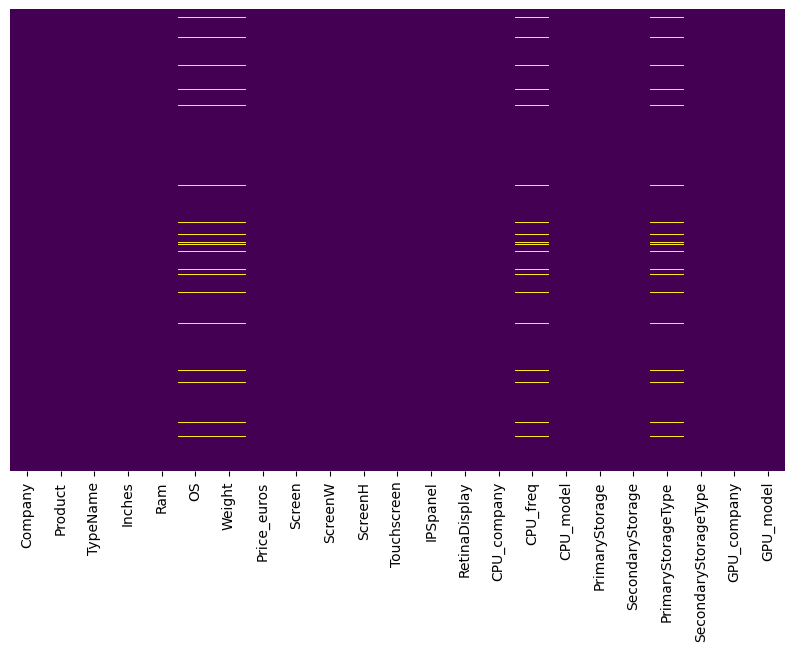

In [11]:
# Visualización de valores nulos
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

In [12]:
# Copiamos el dataframe para no modificar el original
df_knn = df.copy()

# Convertir las variables categóricas a numéricas (KNN solo funciona con números)
categorical_columns = ['OS', 'PrimaryStorageType']

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_knn[col] = le.fit_transform(df_knn[col].astype(str))
    label_encoders[col] = le

# Seleccionamos las columnas que queremos imputar
columns_to_impute = ['Weight', 'CPU_freq', 'OS', 'PrimaryStorageType']

# Creamos el imputador KNN
imputer = KNNImputer(n_neighbors=5)

# Aplicamos el imputador
df_knn[columns_to_impute] = imputer.fit_transform(df_knn[columns_to_impute])

# Devolver las variables categóricas a su forma original
for col in categorical_columns:
    df_knn[col] = label_encoders[col].inverse_transform(df_knn[col].astype(int))

In [13]:
# Visualización de valores nulos después de la imputación
print(df_knn[columns_to_impute].isnull().sum())


Weight                0
CPU_freq              0
OS                    0
PrimaryStorageType    0
dtype: int64


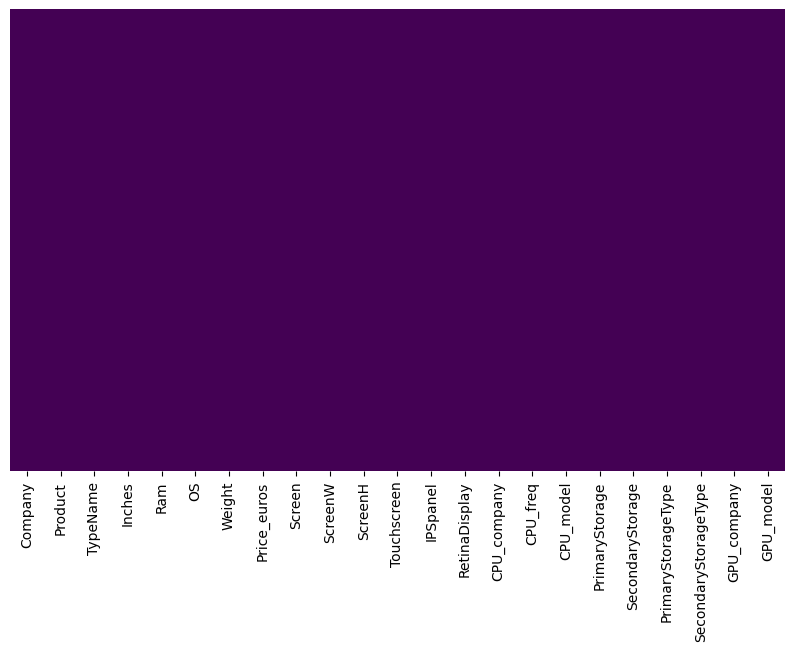

In [14]:
# Visualización de valores nulos
plt.figure(figsize=(10,6))
sns.heatmap(df_knn.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()